# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau!
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [2]:
# !pip install openpyxl

In [624]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from statsmodels.stats.weightstats import ztest

In [14]:
ls

Final_Project_Grocery_store_sales_analysis.ipynb
Grocery Database.xlsx


Ось так можемо переглянути, які є листки в Excel файлі:

In [16]:
# замініть на шлях до файлу на своєму комп`ютері
# path_to_file = '/Users/studio/Desktop/Data Analytics by Hanna/Grocery Database.xlsx'

In [20]:
xl = pd.ExcelFile('Grocery Database.xlsx')
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [22]:
descr = xl.parse('Fact Summary')

In [24]:
descr

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [26]:
df = pd.read_excel('Grocery Database.xlsx')

In [27]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх,
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно**

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql.

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga.
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

In [34]:
df.shape

(50447, 32)

We have 32 columns and 50,447 rows.

In [37]:
df.describe()

,Date,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
count,50447,50447.000000,50447.000000,5.044700e+04,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,5.044700e+04,50447.000000,50447.000000,50447.000000,50447.000000
mean,2018-03-01 09:42:27.410153216,2017.667968,6.476678,9.893557e+09,18.364263,35.801772,7.424184,1.548179,0.029938,11.167962,66.695212,0.085553,72.378916,0.105550,1.500000e-01,0.744450,1.201682,1.726851,8.583809
min,2016-01-01 00:00:00,2016.000000,1.000000,7.919903e+09,0.000000,15.000000,0.840000,1.000000,0.010000,0.798000,0.978500,0.060000,1.037210,0.051000,1.500000e-01,0.700000,0.067840,0.126000,0.609840
25%,2017-03-14 00:00:00,2017.000000,3.000000,9.839283e+09,6.000000,23.000000,4.280000,1.000000,0.020000,5.213600,35.328000,0.070000,38.615940,0.083000,1.500000e-01,0.722000,0.545600,0.805500,4.082890
50%,2018-04-02 00:00:00,2018.000000,7.000000,9.897050e+09,14.000000,35.000000,5.980000,2.000000,0.030000,8.632800,58.586500,0.070000,63.909120,0.109000,1.500000e-01,0.741000,0.928200,1.329000,6.648660
75%,2019-03-05 00:00:00,2019.000000,10.000000,9.950153e+09,26.000000,47.000000,9.470000,2.000000,0.040000,14.016000,90.585000,0.100000,98.076440,0.128000,1.500000e-01,0.767000,1.505270,2.178000,10.828800
max,2019-12-31 00:00:00,2019.000000,12.000000,9.999984e+09,116.000000,75.000000,40.330000,9.000000,0.050000,299.827200,527.668000,0.120000,559.328080,0.150000,1.500000e-01,0.799000,26.234880,46.848000,239.237120
std,NaN,1.111588,3.454349,7.636461e+07,16.161139,14.020367,4.753588,0.648461,0.014230,9.227162,45.269851,0.023568,49.093636,0.029403,1.321178e-13,0.029403,1.063545,1.426844,7.134957


### Аналіз категоріальних змінних

In [39]:
df.select_dtypes(include = "object").columns

Index(['Receipt Number', 'Time', 'Membership ID', 'Gender', 'City', 'Country',
       'Category', 'Sub_Category', 'Items', 'Brand ', 'Description ',
       'Payment Mode', 'Bank Name'],
      dtype='object')

In [44]:
len(df.select_dtypes(include = "object").columns)

13

In our Data Set we have 13 out of 32 calegorical columns 

In [61]:
df.select_dtypes(include = "object")

,Receipt Number,Time,Membership ID,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Payment Mode,Bank Name
0,GIJ00001,10:08:03.260000,MIDID0001,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,Card,Enterprise Bank
1,GIJ00002,15:46:50.832000,MIDID0002,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,Card,Philippine Veterans Bank
2,GIJ00003,11:28:52.166000,MIDID0003,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,Cash,BDO Unibank
3,GIJ00003,11:28:52.166000,MIDID0003,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,Cash,BDO Unibank
4,GIJ00003,11:28:52.166000,MIDID0003,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,Cash,BDO Unibank
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,20:59:27.302000,MIDSG0630,Female,Woodlands,Singapore,Frozen,Frozen Meat,Minced Pork,Betagro,320 g,Card,Philippine National bank
50443,GSW01534,13:14:45.030000,MIDSG0293,Female,Woodlands,Singapore,"Dairy, Chilled & Eggs",Deli & Cooked Meat,Straky Bacon,Citterio,240 g,Wallet,Philippine National bank
50444,GSW01535,10:01:32.657000,MIDSG0150,Female,Woodlands,Singapore,Kitchen & Dining,BBQ Supplies,Swee! Disposable bamboo chopsticks,Swee!,203 per pack,Card,BDO Unibank
50445,GSW01535,10:01:32.657000,MIDSG0150,Female,Woodlands,Singapore,Bakery & Breakfast,"Jams, Honey & Spreads",Squeezy organic honey,Adams,453g,Card,BDO Unibank


We can change Time column for datetime format

In [75]:
df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].str[:8]

In [108]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [110]:
type(df['Time'])

pandas.core.series.Series

Here I would like to add an hour column

In [92]:
df['Hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S').dt.hour

In [100]:
len(df.select_dtypes(include = "object").columns)

13

Now we still have 13 categorical columns

#### Розподіл категоріальних змінних

------------------>>>>>> Gender <<<<<<------------------
Gender
Female    41822
Male       8625
dtype: int64


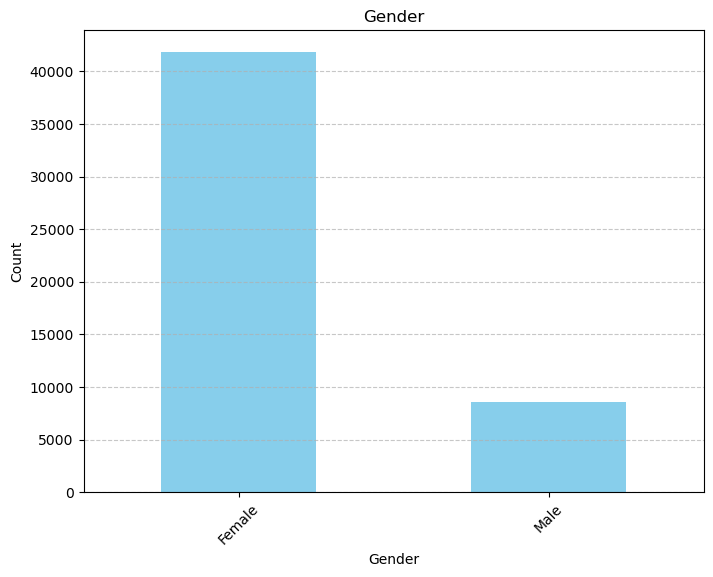

------------------>>>>>> City <<<<<<------------------
City
Manila          12380
Bedok           12272
Kuala Lumpur    10763
Jakarta          9108
Woodlands        5924
dtype: int64


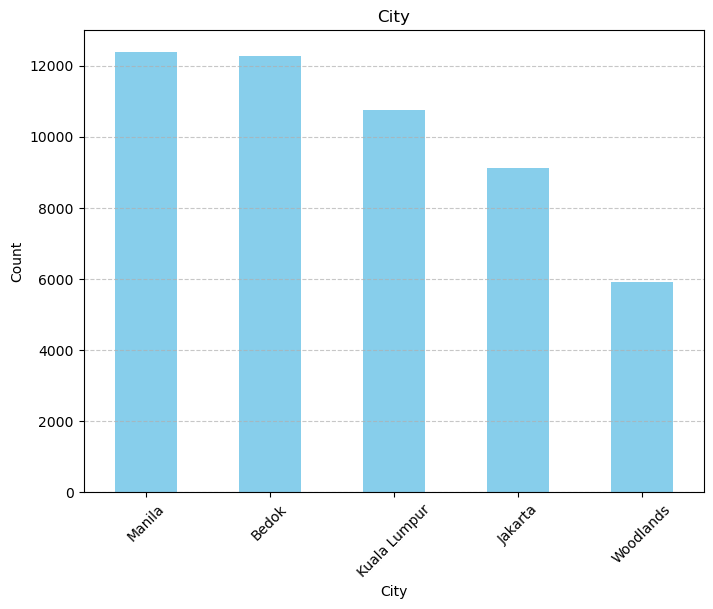

------------------>>>>>> Country <<<<<<------------------
Country
Singapore      18196
Philippines    12380
Malaysia       10763
Indonesia       9108
dtype: int64


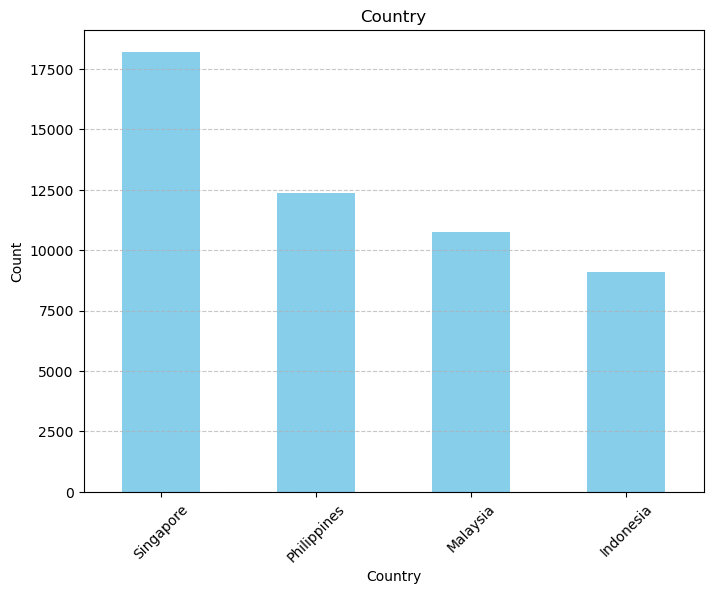

------------------>>>>>> Category <<<<<<------------------
Category
Bakery & Breakfast           6770
Frozen                       6393
Beauty                       5205
Fruit & Vegetable            4370
Pet Care                     3465
Dairy, Chilled & Eggs        3381
Choco, Snacks, Sweets        3019
Kitchen & Dining             2552
Rice & Cooking Essentials    2432
Beverages                    2208
Meat & Seafood               2149
Mother & Baby                2064
Household                    1881
Party Supplies               1836
Wines, Beers & Spirits       1714
Health                       1008
dtype: int64


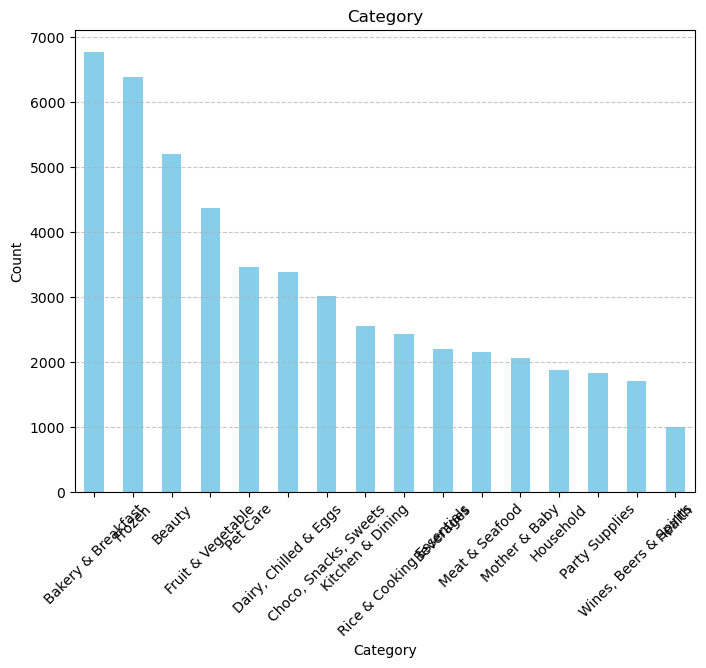

------------------>>>>>> Sub_Category <<<<<<------------------
Sub_Category
BBQ Supplies                 2552
Dog Food & Trat              2233
Oral Care                    2155
Disposable Tableware         1836
Frozen Vegetables            1772
                             ... 
Rose & Dessert Wine            25
Litter & Toilet                16
White wine                     14
Red Wine                       14
Champagne & Spakling Wine       7
Length: 75, dtype: int64
------------------>>>>>> Items <<<<<<------------------
Items
Sainsbury salted tortilla chips        849
Ashai Lager Beer                       813
Lamb pate dog food                     653
Anchor salted pure butter              647
Nutro Beef with vegetables dog food    646
                                      ... 
Clif Bar Chocolate brownie               1
instant oats                             1
Clif Bar cranberry and mango muesli      1
Alpen chocolate protein bars             1
Cat lavender cat litter          

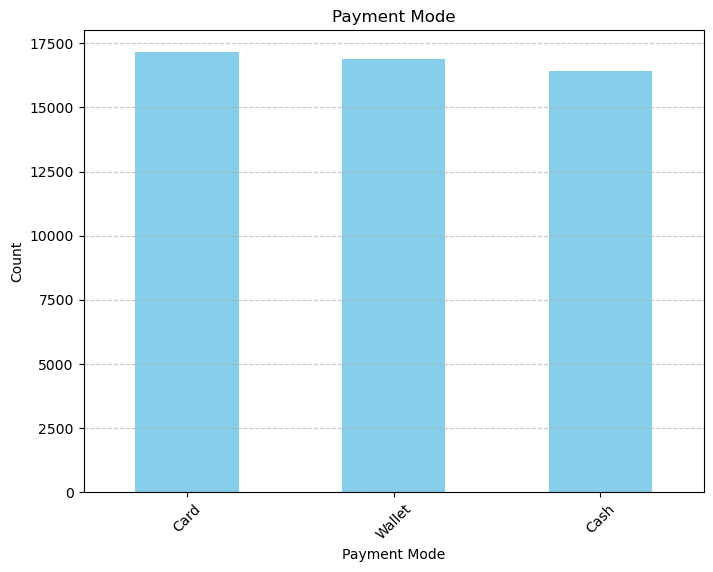

------------------>>>>>> Bank Name <<<<<<------------------
Bank Name
BDO Unibank                 11172
Philippine Veterans Bank    10154
Philippine National bank    10118
Enterprise Bank              9628
ING Bank                     9056
Cash                           84
Deutsche Bank                  53
ALLIANCE Bank                  50
Agrobank                       47
Bank Central Asia              21
Affin Bank                     20
Philtrust Bank                 20
Bank Rakhyat                   15
Robinsons Bank                  9
dtype: int64


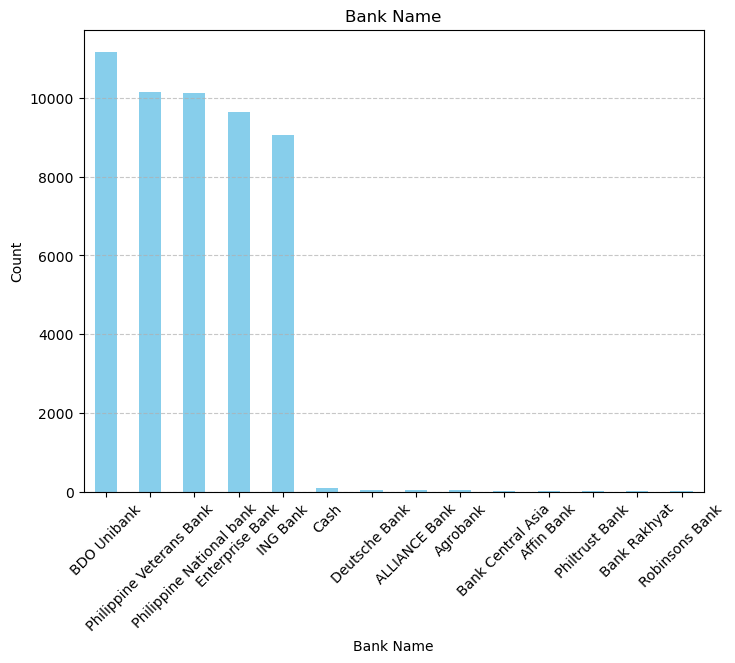

In [141]:
categorical_columns = ['Gender', 'City', 'Country',
       'Category', 'Sub_Category', 'Items', 'Brand ',
       'Payment Mode', 'Bank Name']
for i in categorical_columns:
    counts = df.groupby(i).size()
    counts = counts.sort_values(ascending=False)

    if len(counts) > 20:
        print(f'------------------>>>>>> {i} <<<<<<------------------'),
        print(counts)
    else:
        print(f'------------------>>>>>> {i} <<<<<<------------------'),
        print(counts)

        plt.figure(figsize=(8, 6))
        counts.plot(kind='bar', color='skyblue')
        plt.title(i)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

### Аналіз числових змінних

In [94]:
number_df = df.select_dtypes(include="number")

In [102]:
number_df.columns

Index(['Year', 'Month', 'Mobile Number', 'Loyalty Card Points', 'Age', 'Price',
       'QTY', 'DISC', 'Amount', 'Net Bill Amount', 'GST', 'Gross Bill Amount',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost', 'Hour'],
      dtype='object')

In [98]:
len(number_df.columns)

19

Also in our Data Set we have 18 out of 32 numeric columns 

In [57]:
number_df.head()

,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,2016,1,9793548581,1,36,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,2016,1,9938441276,2,54,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,2016,1,9976742552,1,16,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,2016,1,9976742552,1,16,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,2016,1,9976742552,2,16,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,0.120,0.15,0.730,0.52920,0.6615,3.21930


------------------>>>>>> Year <<<<<<------------------
count    50447.000000
mean      2017.667968
std          1.111588
min       2016.000000
25%       2017.000000
50%       2018.000000
75%       2019.000000
max       2019.000000
Name: Year, dtype: float64


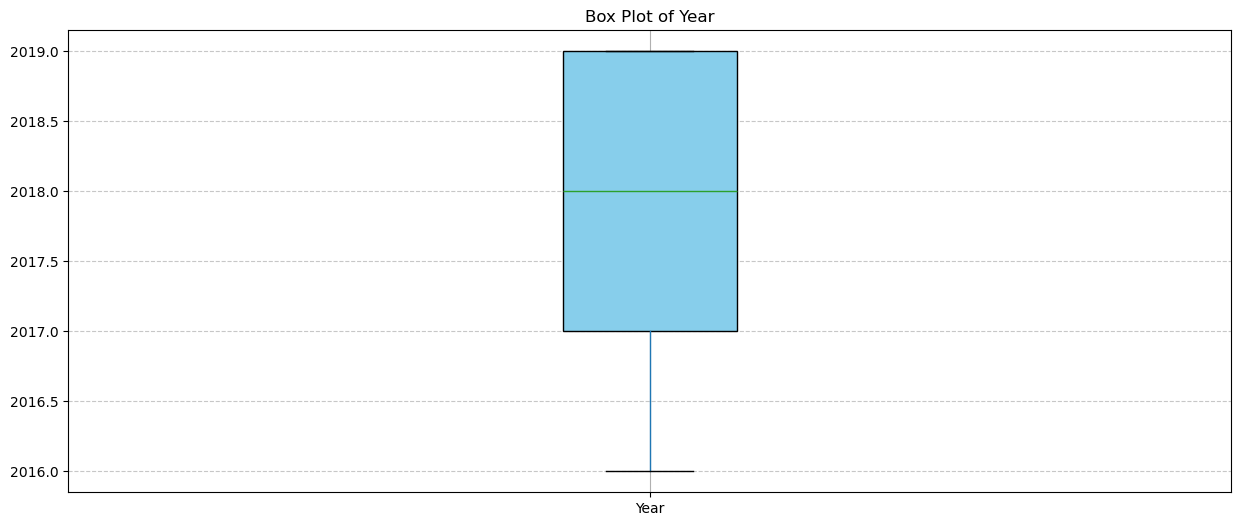

------------------>>>>>> Month <<<<<<------------------
count    50447.000000
mean         6.476678
std          3.454349
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: Month, dtype: float64


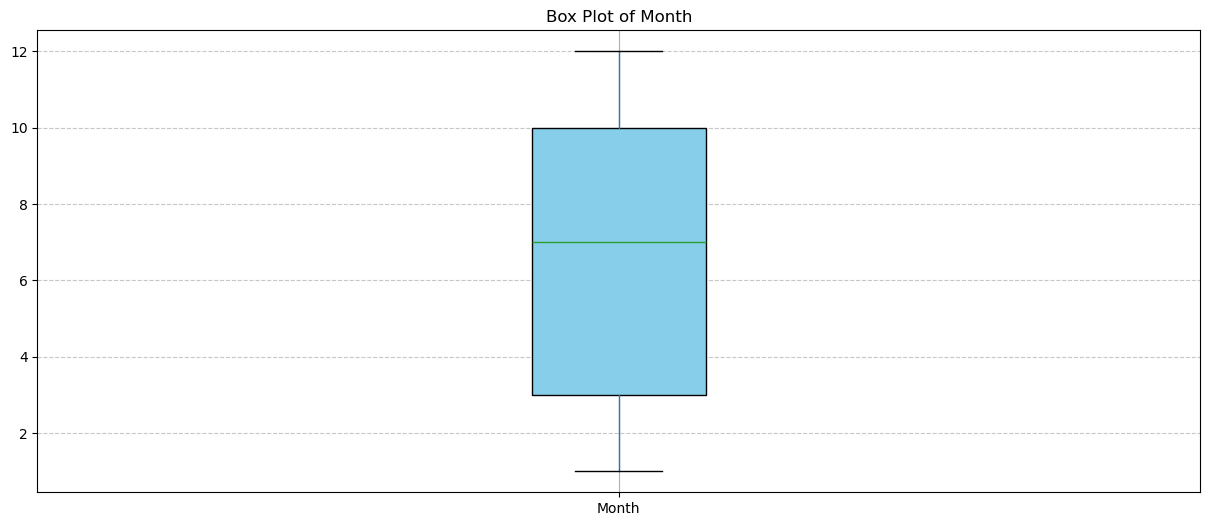

------------------>>>>>> Loyalty Card Points <<<<<<------------------
count    50447.000000
mean        18.364263
std         16.161139
min          0.000000
25%          6.000000
50%         14.000000
75%         26.000000
max        116.000000
Name: Loyalty Card Points, dtype: float64


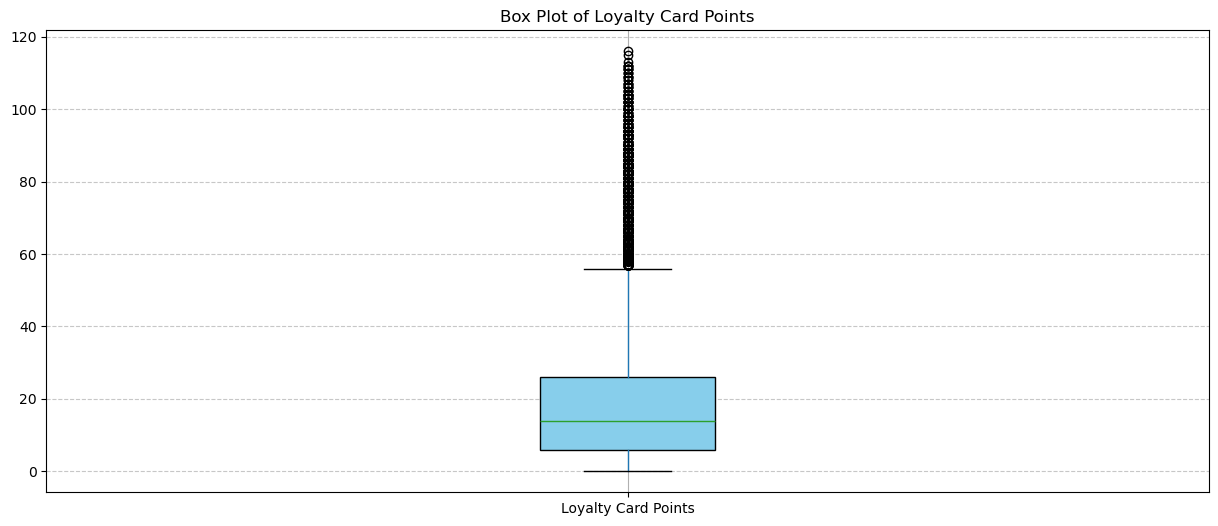

------------------>>>>>> Age <<<<<<------------------
count    50447.000000
mean        35.801772
std         14.020367
min         15.000000
25%         23.000000
50%         35.000000
75%         47.000000
max         75.000000
Name: Age, dtype: float64


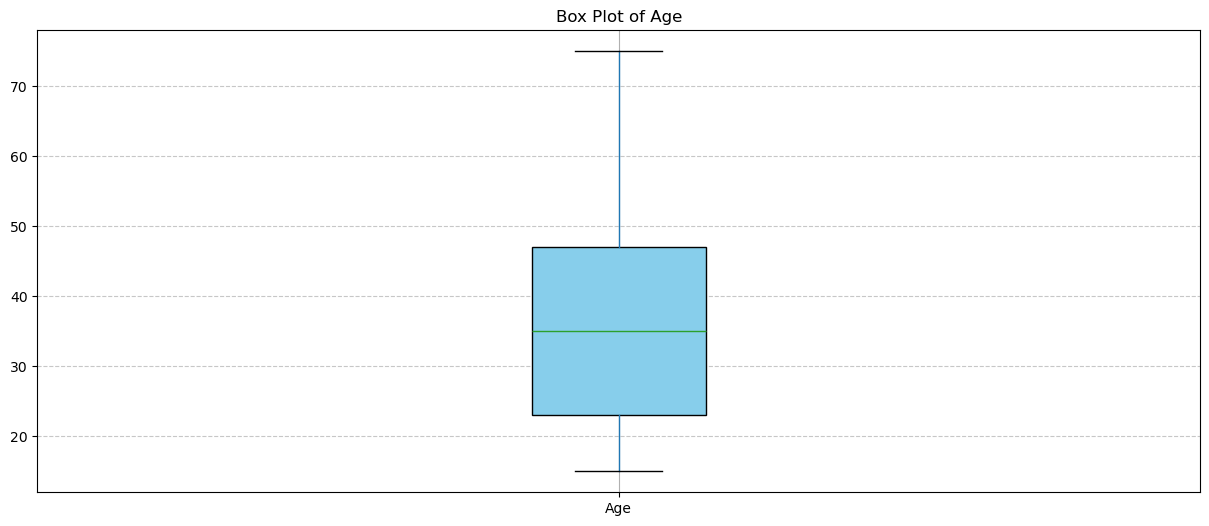

------------------>>>>>> Price <<<<<<------------------
count    50447.000000
mean         7.424184
std          4.753588
min          0.840000
25%          4.280000
50%          5.980000
75%          9.470000
max         40.330000
Name: Price, dtype: float64


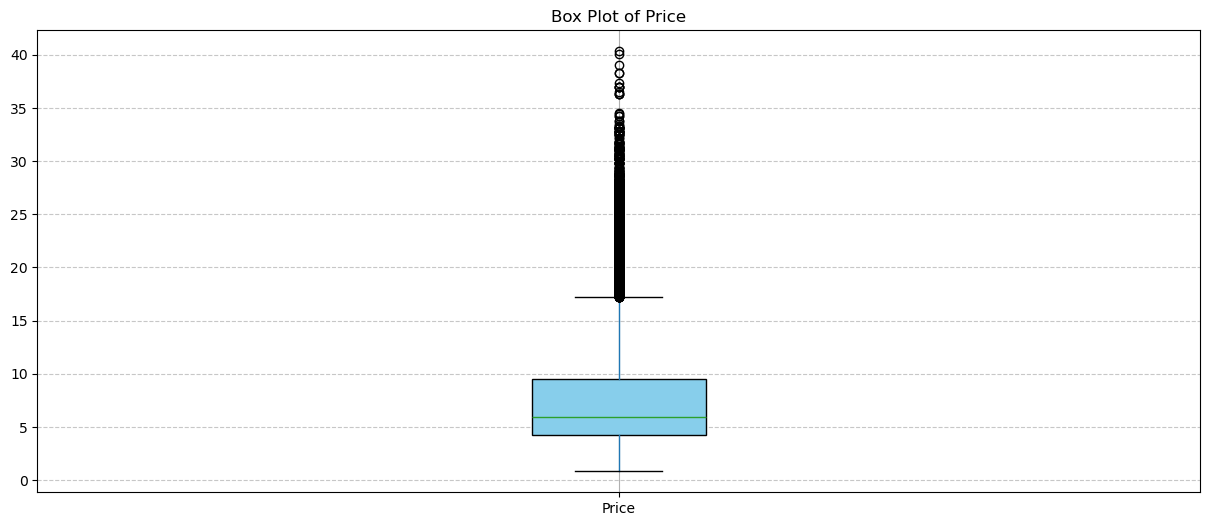

------------------>>>>>> QTY <<<<<<------------------
count    50447.000000
mean         1.548179
std          0.648461
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: QTY, dtype: float64


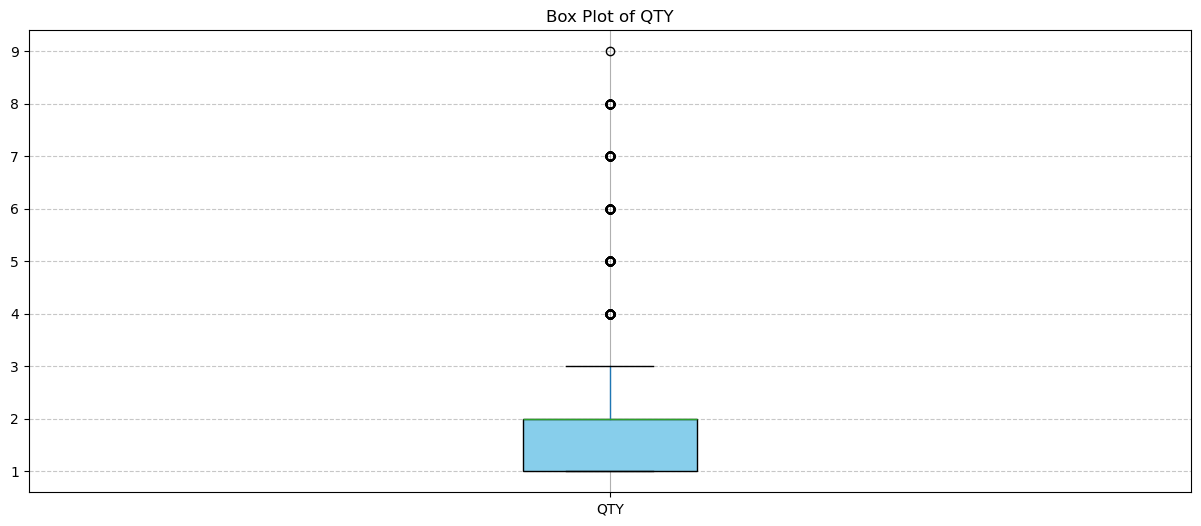

------------------>>>>>> DISC <<<<<<------------------
count    50447.000000
mean         0.029938
std          0.014230
min          0.010000
25%          0.020000
50%          0.030000
75%          0.040000
max          0.050000
Name: DISC, dtype: float64


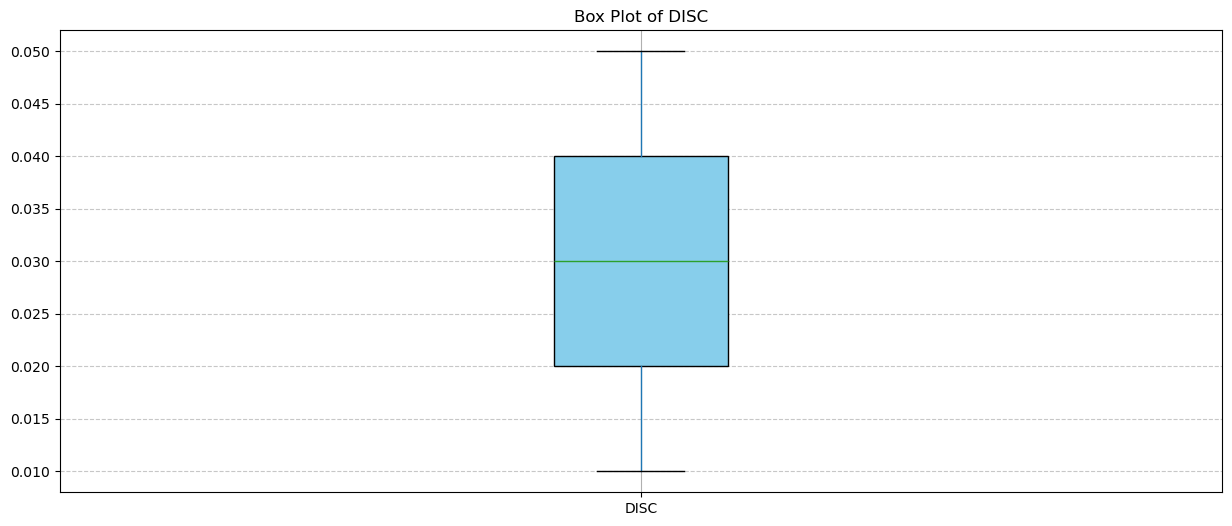

------------------>>>>>> Amount <<<<<<------------------
count    50447.000000
mean        11.167962
std          9.227162
min          0.798000
25%          5.213600
50%          8.632800
75%         14.016000
max        299.827200
Name: Amount, dtype: float64


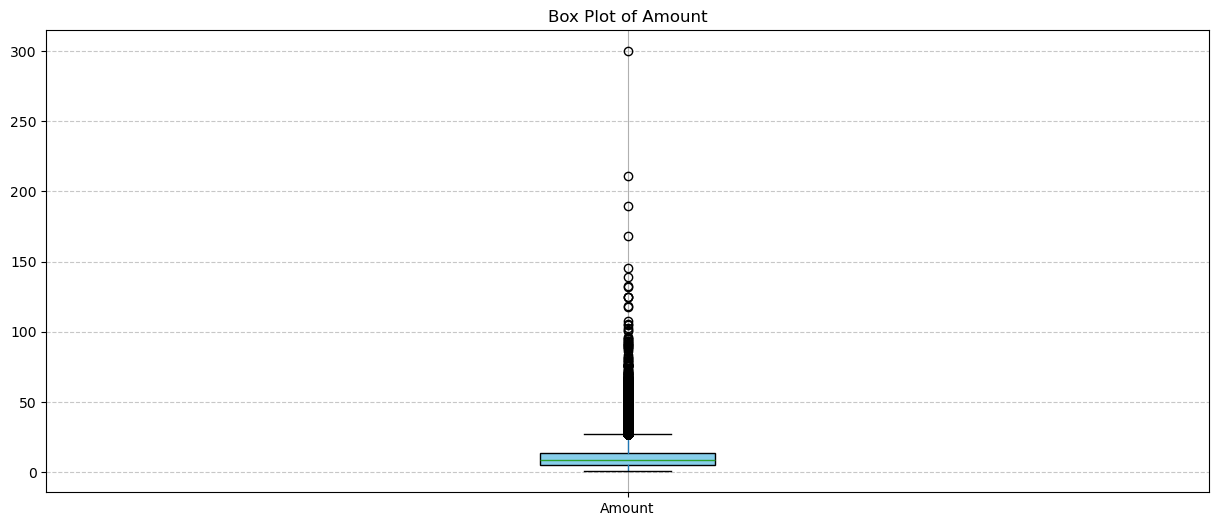

------------------>>>>>> Net Bill Amount <<<<<<------------------
count    50447.000000
mean        66.695212
std         45.269851
min          0.978500
25%         35.328000
50%         58.586500
75%         90.585000
max        527.668000
Name: Net Bill Amount, dtype: float64


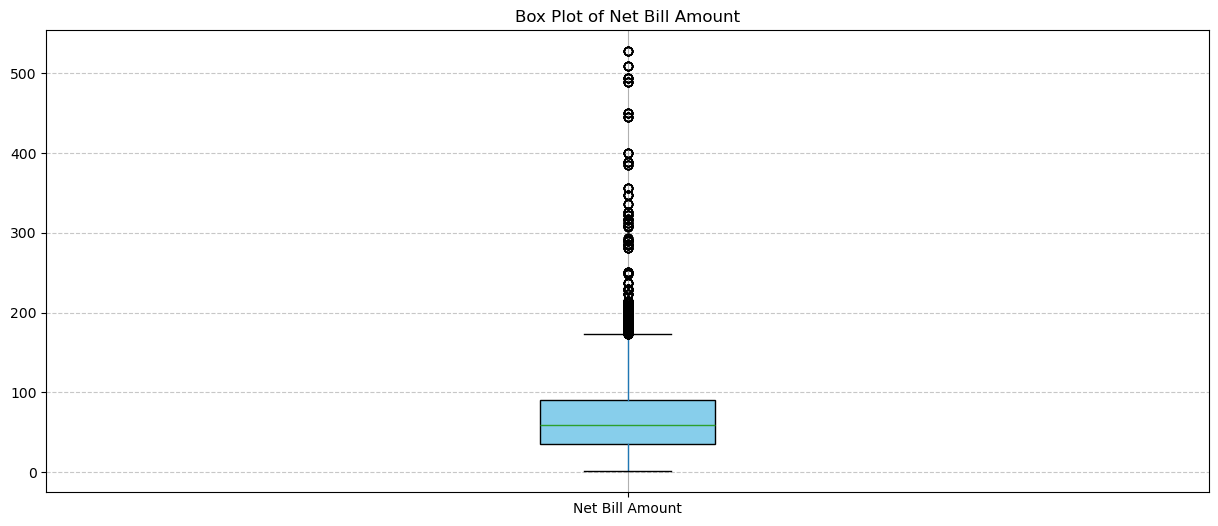

------------------>>>>>> GST <<<<<<------------------
count    50447.000000
mean         0.085553
std          0.023568
min          0.060000
25%          0.070000
50%          0.070000
75%          0.100000
max          0.120000
Name: GST, dtype: float64


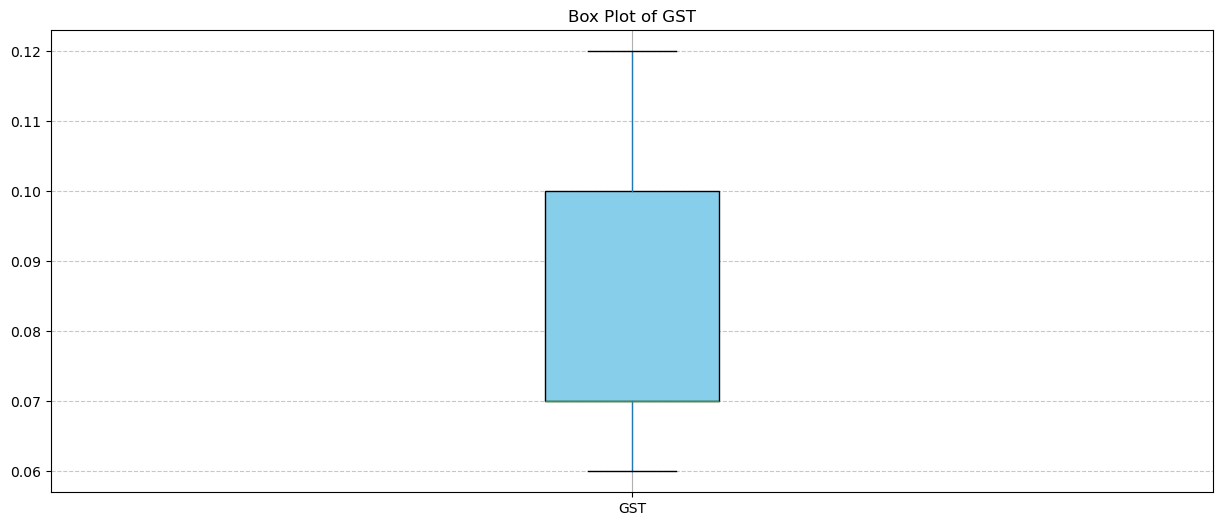

------------------>>>>>> Gross Bill Amount <<<<<<------------------
count    50447.000000
mean        72.378916
std         49.093636
min          1.037210
25%         38.615940
50%         63.909120
75%         98.076440
max        559.328080
Name: Gross Bill Amount, dtype: float64


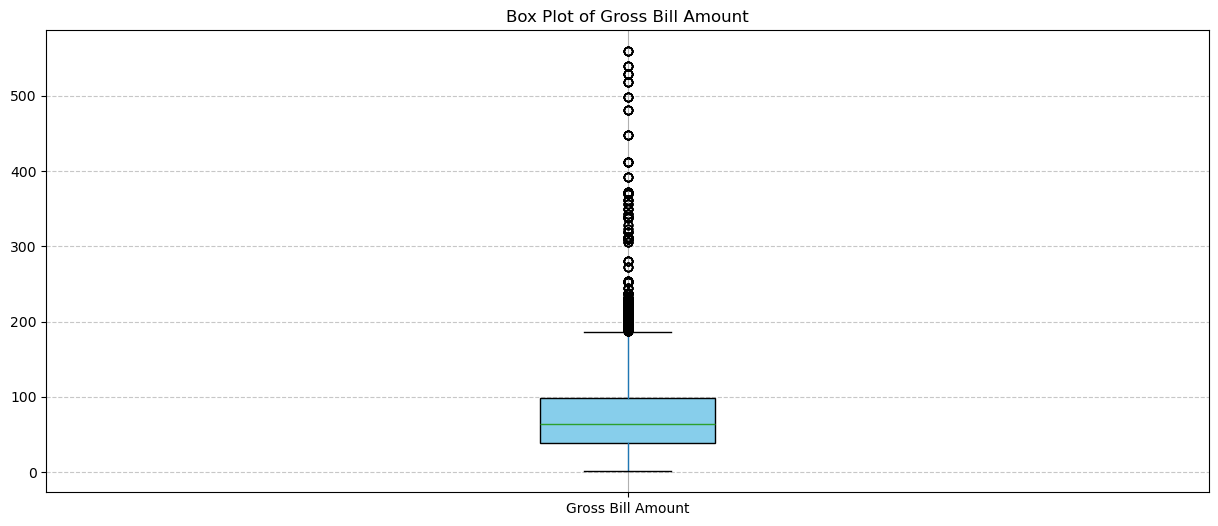

------------------>>>>>> % Profit Margin <<<<<<------------------
count    50447.000000
mean         0.105550
std          0.029403
min          0.051000
25%          0.083000
50%          0.109000
75%          0.128000
max          0.150000
Name: % Profit Margin, dtype: float64


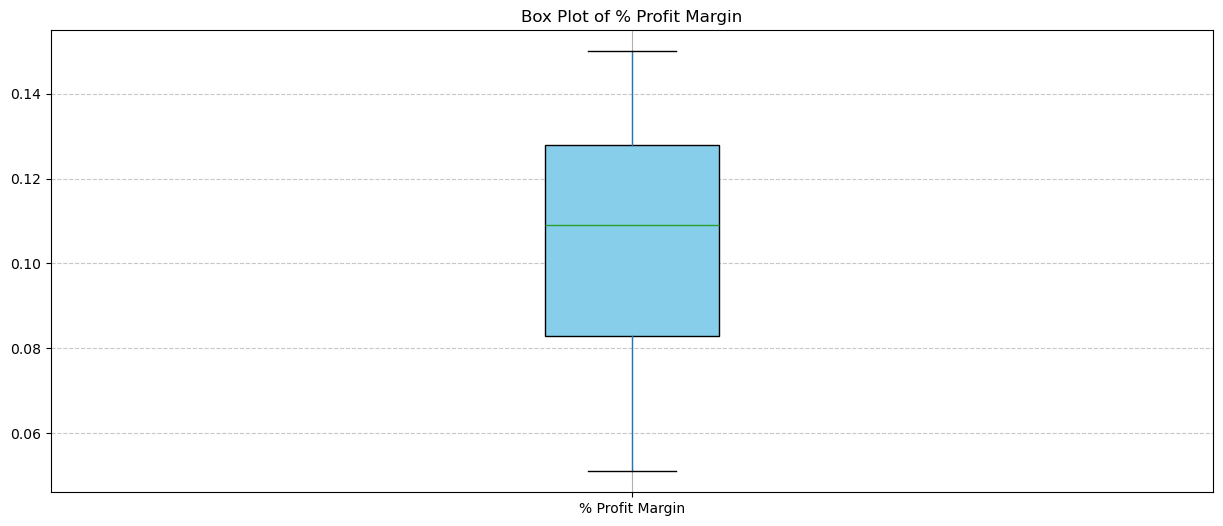

------------------>>>>>> % Operating Cost <<<<<<------------------
count    5.044700e+04
mean     1.500000e-01
std      1.321178e-13
min      1.500000e-01
25%      1.500000e-01
50%      1.500000e-01
75%      1.500000e-01
max      1.500000e-01
Name: % Operating Cost, dtype: float64


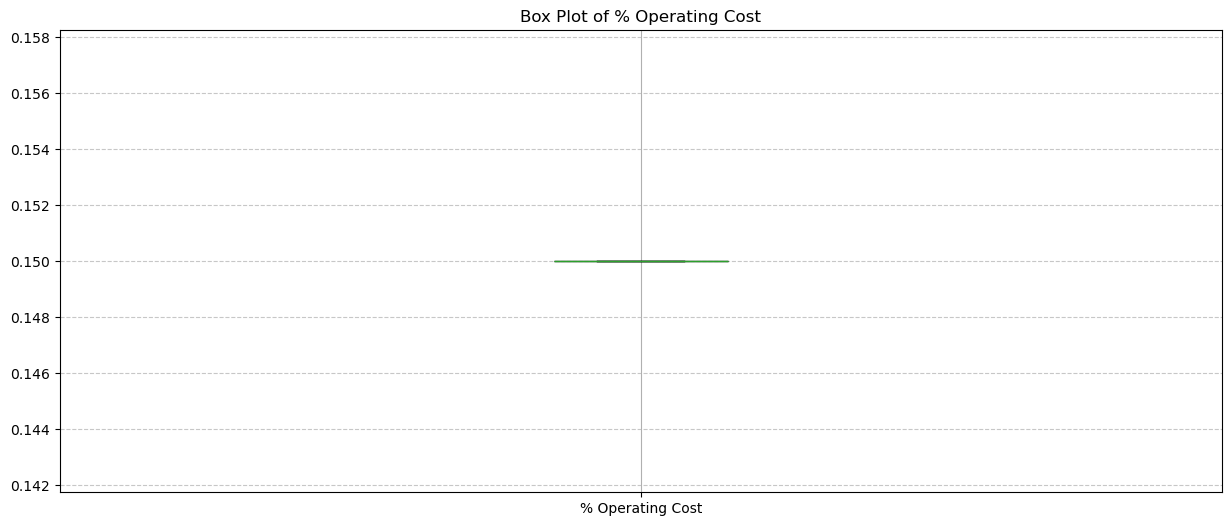

------------------>>>>>> % Product Cost <<<<<<------------------
count    50447.000000
mean         0.744450
std          0.029403
min          0.700000
25%          0.722000
50%          0.741000
75%          0.767000
max          0.799000
Name: % Product Cost, dtype: float64


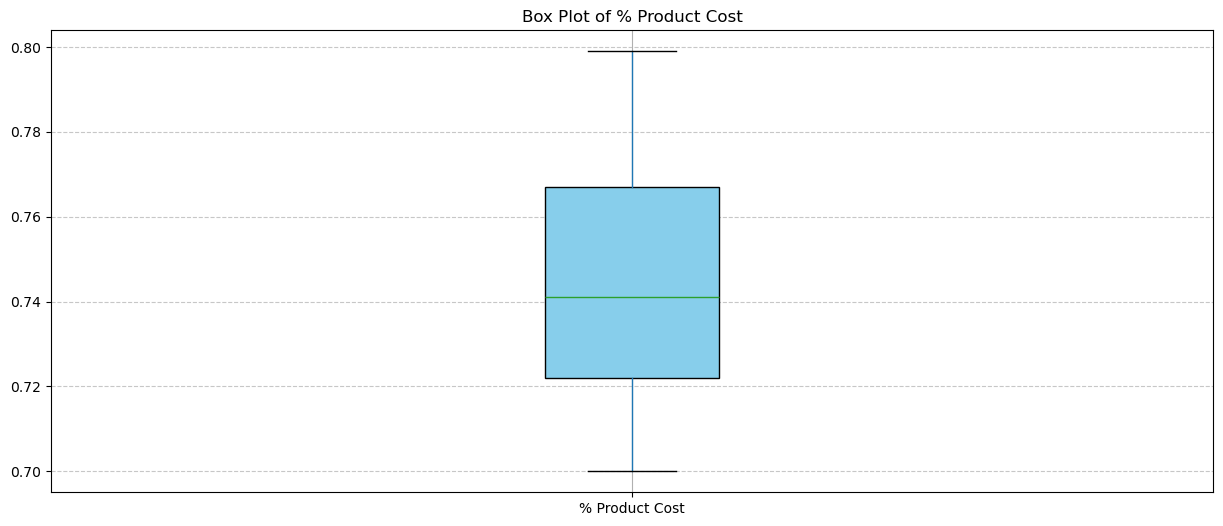

------------------>>>>>> Profit Margin <<<<<<------------------
count    50447.000000
mean         1.201682
std          1.063545
min          0.067840
25%          0.545600
50%          0.928200
75%          1.505270
max         26.234880
Name: Profit Margin, dtype: float64


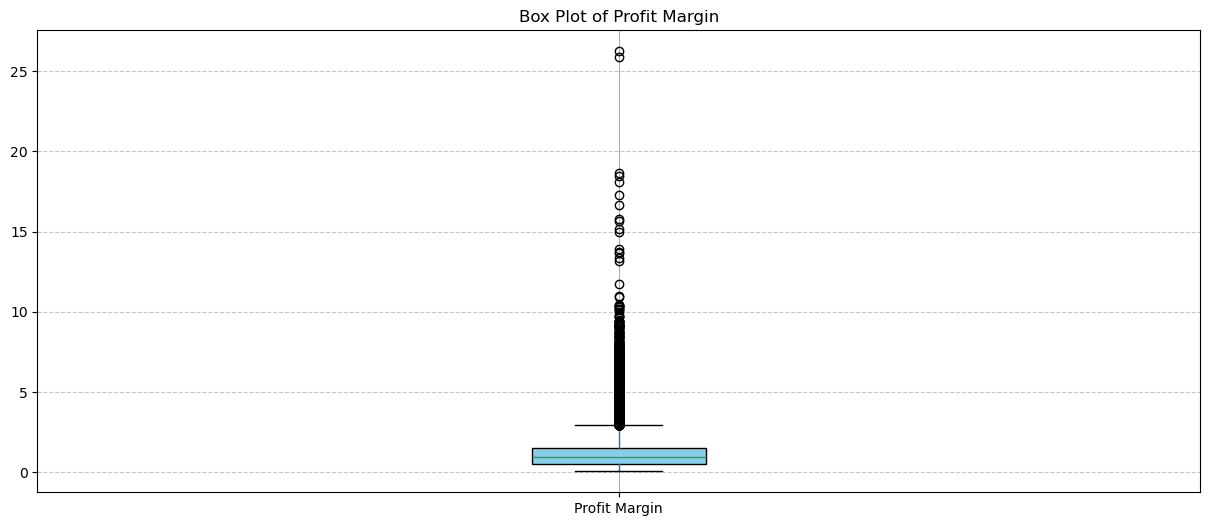

------------------>>>>>> Operating Cost <<<<<<------------------
count    50447.000000
mean         1.726851
std          1.426844
min          0.126000
25%          0.805500
50%          1.329000
75%          2.178000
max         46.848000
Name: Operating Cost, dtype: float64


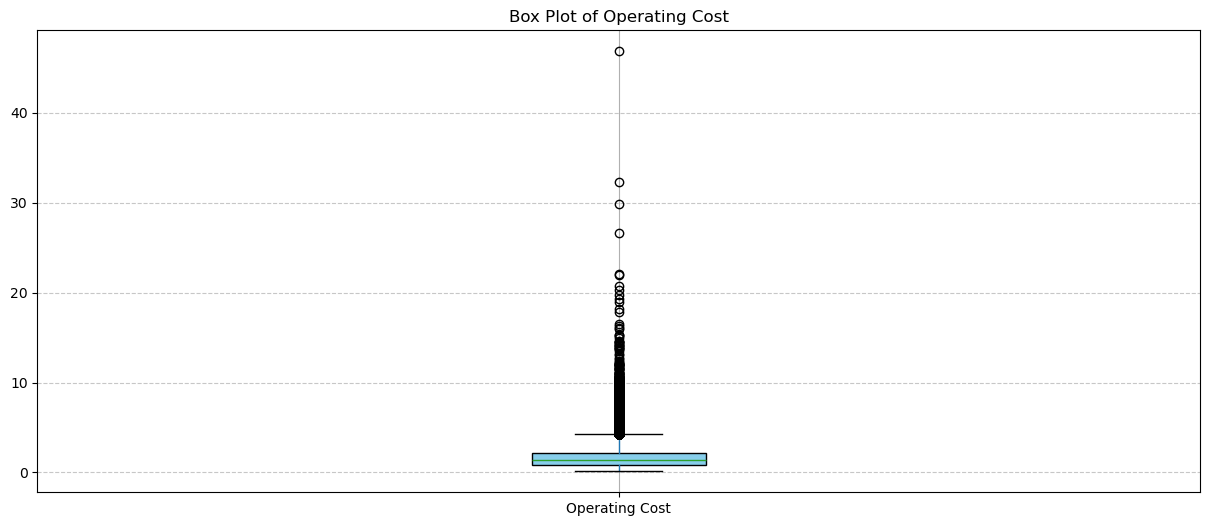

------------------>>>>>> Product Cost <<<<<<------------------
count    50447.000000
mean         8.583809
std          7.134957
min          0.609840
25%          4.082890
50%          6.648660
75%         10.828800
max        239.237120
Name: Product Cost, dtype: float64


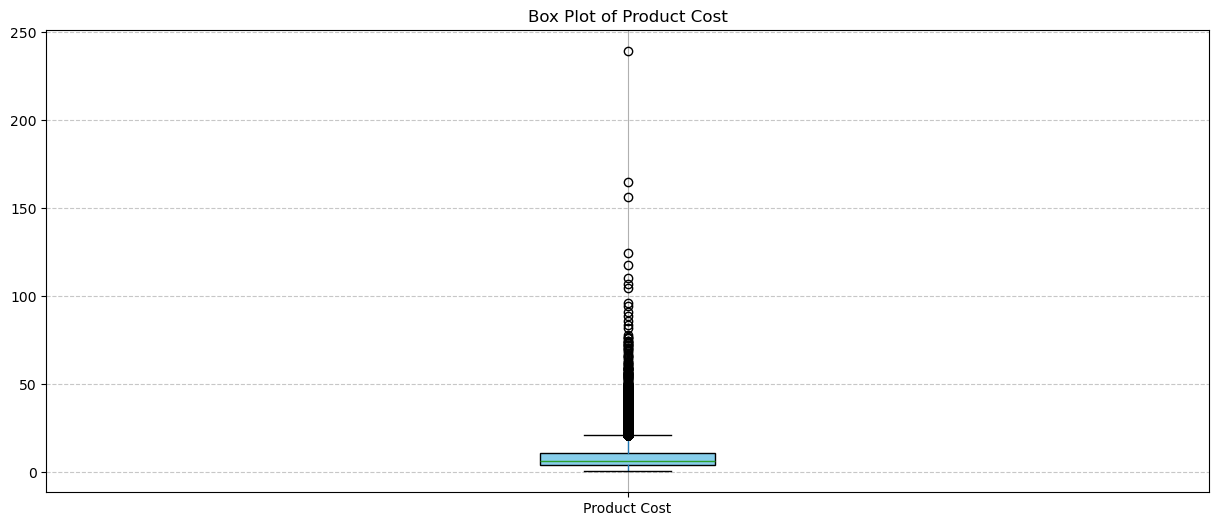

------------------>>>>>> Hour <<<<<<------------------
count    50447.000000
mean        15.542232
std          3.456671
min         10.000000
25%         13.000000
50%         16.000000
75%         19.000000
max         21.000000
Name: Hour, dtype: float64


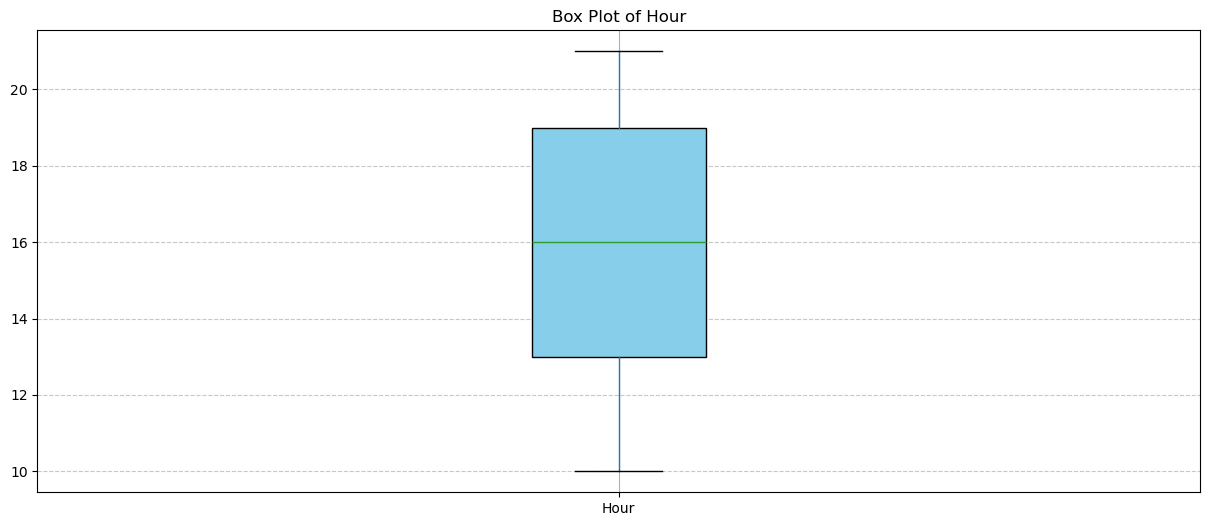

In [137]:
numeric_columns_plot = ['Year', 'Month', 'Loyalty Card Points', 'Age', 'Price',
       'QTY', 'DISC', 'Amount', 'Net Bill Amount', 'GST', 'Gross Bill Amount',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost', 'Hour']

for column in numeric_columns_plot:
    print(f'------------------>>>>>> {column} <<<<<<------------------'),
    print(df[column].describe()),
    plt.figure(figsize=(15, 6))
    df.boxplot(column = column, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Box Plot of {column}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Робота з пропущеними значеннями

In [163]:
df.columns[df.isnull().any()]

Index([], dtype='object')

We don't have any missing values in our df and distribution from boxplots looks normal (without outlayrs) for each of numeric columns

### Питання

#### Яка з Категорій товарів є найбільш прибутковими та найменш прибутковими

In [279]:
df_profit = df[['Category', 'Sub_Category', 'Items', '% Profit Margin']]

In [281]:
df_profit_category_percent = df[['Category','% Profit Margin']].groupby(by = 'Category').mean().sort_values(by = '% Profit Margin', ascending = False)
df_profit_category_percent

,% Profit Margin
Category,
Party Supplies,0.126000
Pet Care,0.124506
Frozen,0.122553
Bakery & Breakfast,0.115503
"Choco, Snacks, Sweets",0.109783
Kitchen & Dining,0.109000
Fruit & Vegetable,0.106878
Mother & Baby,0.106520
"Wines, Beers & Spirits",0.101090


Найбільш прибутковими є ʼParty Suppliesʼ, ʼPet Careʼ та ʼFrozenʼ. Найменш прибутковими є ʼHouseholdʼ, ʼDairy, Chilled & Eggsʼ та ʼHealthʼ

#### Які субкатегорії товарів та позиції є найменш прибутковими. Можливо, є сенс перестати їх продавати

In [283]:
pivot_table = df.pivot_table(
    index=['Category', 'Sub_Category', 'Items'],   
    values='% Profit Margin',              
    aggfunc='mean'                        
)

sorted_pivot_table = pivot_table.sort_values(by = '% Profit Margin', ascending = False)
sorted_pivot_table

% Profit Margin
Category              Sub_Category        Items                                               
Choco, Snacks, Sweets sweets              Rocky mountain classic marshmallows            0.150
                      Biscuits & Crackers Hup seng cream crackers                        0.150
Frozen                Bread & Pasteries   Puff Pastry                                    0.150
                                          Plain bagel                                    0.150
                                          Home Roti Paratha                              0.150
...                                                                                        ...
                      Frozen Fruits       Organic mixed berries fruits                   0.051
                                          Whole korean strawberry                        0.051
                                          strawberry Frozen                              0.051
Choco, Snacks, Sweets Nuts, Peas & Seeds  camel roasted cashews                          0.051
                                          camel natural pistachios                       0.051

[609 rows x 1 columns]

In [285]:
df_profit_category = df[['Items','Profit Margin']].groupby(by = 'Items').sum().sort_values(by = 'Profit Margin', ascending = False)
df_profit_category

,Profit Margin
Items,
Ashai Lager Beer,1764.15428
Cascadian farm organic strawberries,1094.56347
Alpo Chicken pate dog food,995.04248
Lamb pate dog food,915.99124
Fresh Soyamilk,845.88239
...,...
wholewheat toasted bread,0.20100
Clif Bar cranberry and mango muesli,0.17290
German multigrain roll,0.15525


Як бачимо, збиткових товарів у нас немає. Подивимось більш детально найменш прибуткові категорії.

In [288]:
pivot_table.loc[pivot_table.index.get_level_values('Category') == 'Household']

% Profit Margin
Category  Sub_Category      Items                                                             
Household Air Care          AMBI PUR Dehumidifier                                        0.128
                            Fresh Lavender Fragrance beads                               0.128
                            Glade wild lavender air freshner                             0.128
                            Hakugen Lemon air freshner                                   0.128
                            Lavender Air freshner                                        0.128
                            Ocean escape air freshner                                    0.128
          Cleaning Supplies Arm & Hammer Fridge N Freezer baking soda                    0.053
                            Aromatic lavender floor cleaner                              0.053
                            Colorox Wiper dry sheet value pack                           0.053
                            Haevy duty scrub sponge value pack                           0.053
                            Harpic lavender fresh active cleaning gel                    0.053
                            MagicLean Antibacteria wet wipes                             0.053
                            Nakd gluten free bakewell tart raw fruit and nuts            0.053
          Dishwashing       Ajax Kim poh dishwashing liquid                              0.053
                            Clean & Fresh Lemon gold dishwashing liquid                  0.053
                            Lemon dishwasher tablets                                     0.053
                            Mama Lemon Anti-Backteria citrus dishwashing                 0.053
                            Somat Natural lemon fragrance                                0.053
                            UIC big value Natural Aniti backteria                        0.053
          Kitchen Supplies  Lottermart Soup and salad containers and lids                0.058
          Laundry           Comfort Low suds powder detergent                            0.091
                            Dynamo Anti-Backteria laundry detergent                      0.091
                            Fresh fabric softener refill                                 0.091
                            Super color liquid detergent refill                          0.091
                            Vanish liquid detergent refill                               0.091
                            regular laundry detergent                                    0.091
          Paper             Dettol Anti-backteria wet wipes                              0.087
                            Facial tissue soft pack                                      0.087
                            Facial tissues Flora                                         0.087
                            Nufresh Silky soft and white facial tissue                   0.087
                            Onwards Skin cleansing wipes                                 0.087
                            facial tissue                                                0.087

Бачимо, що найменш прибуткові товари з дохіднісню трохи більше 5% у нас в підкатегоріях Cleaning Supplies, Dishwashing, Kitchen Supplies. Можна поглянути більш детально на інші позиції в інших категорія з дохідністю менше 6%.

In [291]:
sorted_pivot_table[sorted_pivot_table['% Profit Margin'] < 0.06].index.get_level_values('Category').unique()

Index(['Health', 'Household', 'Fruit & Vegetable', 'Dairy, Chilled & Eggs',
       'Choco, Snacks, Sweets', 'Frozen'],
      dtype='object', name='Category')

Крім 'Household' ще є декілька категорій, де є не надто прибуткові товари. Пропоную перевірити.

In [294]:
pivot_table.loc[pivot_table.index.get_level_values('Category') == 'Health']

% Profit Margin
Category Sub_Category                 Items                                                              
Health   Adult Diapers & Incontinence Certainity Adult care fil diapers                             0.061
                                      Certainity Day pants                                          0.061
                                      Certainty value M18 adult diapers                             0.061
                                      Depend plus unisex adult diapers                              0.061
                                      Lifree Powerfull thin pants                                   0.061
                                      Tena Adult diapers                                            0.061
         Medical Supplies             Gaviscon Adult care pads extra nin - wing                     0.059
                                      Menthol cough Lozenges                                        0.059
                                      Nurofen Mouthwash                                             0.059
                                      Panadol Cap limau yu yee medicated oil                        0.059
                                      Poise Cough and cold for cough cold and flu relief            0.059
                                      Strepsils Extra pain relief for strong headache               0.059
         Over The Counter Medications Actifast for fast pain relief                                 0.086
                                      Cold relief for fever and blocked nose                        0.086
                                      Nakd Light summer fruits cereal bars                          0.086
                                      Po Chai Hot remedy cold and flu for early cold                0.086
                                      Strawberry Flavour pain and fever relief                      0.086
                                      Tiger balm white ointment                                     0.086
                                      optrex eye drops                                              0.086
         Sports Nutrition             Barr-irn Bru sufar free                                       0.084
                                      H-two-O original isotonic dring-case                          0.084
                                      Monster Energy Drink                                          0.084
                                      Monster Ultra violet energy drink                             0.084
         Vitamins & Suppliments       Ensure life HMB vanilla                                       0.103
                                      H-two original isotonic drink                                 0.103
                                      Monster Energy drink                                          0.103
                                      New Moon Chocolate ice cream                                  0.103
                                      Triple care milk powder                                       0.103
                                      Ultra violet energy drink                                     0.103

У категорії 'Health' субкатегорія "Medical Supplies" з найменшою дохідністю - 5.9%.

In [297]:
pivot_table.loc[pivot_table.index.get_level_values('Category') == 'Frozen']

% Profit Margin
Category Sub_Category      Items                                              
Frozen   Bread & Pasteries Eggo Mini buttermilk pancake                  0.150
                           Frozen par baked half barguette               0.150
                           Home Roti Paratha                             0.150
                           Plain bagel                                   0.150
                           Puff Pastry                                   0.150
                           jus-rol puff pastry                           0.150
         Frozen Fruits     Berry field blueberry fruits                  0.051
                           Blueberries and strawberry                    0.051
                           Oraganic acai berry                           0.051
                           Organic mixed berries fruits                  0.051
                           Whole korean strawberry                       0.051
                           strawberry Frozen                             0.051
         Frozen Meat       Boneless chicken breast                       0.141
                           Chicken Franks                                0.141
                           Chicken Nuggets                               0.141
                           Minced Pork                                   0.141
                           Pork Spare rib                                0.141
                           pork belly                                    0.141
         Frozen Seafood    Chilean seabass                               0.146
                           Crab flavored sticks                          0.146
                           Nile fish                                     0.146
                           Seafood Norwegian                             0.146
                           Seafood Saba fillets                          0.146
                           Seafood canadian scallops                     0.146
         Frozen Vegetables Baby peas                                     0.124
                           Chopped Chives                                0.124
                           Chopped spinach                               0.124
                           Green peas                                    0.124
                           Riced Cauliflower                             0.124
                           Sweet Corn                                    0.124
         Ice Cream         Ben & Jerry Intense dark ice cream            0.107
                           Chornetto Chocolate ice cream                 0.107
                           Lotte Almond white ice cream                  0.107
                           Magnum Almond Ice cream                       0.107
                           Mint Ice Cream                                0.107
                           Picard Nut ice cream                          0.107

У категорії 'Frozen' субкатегорія "Frozen Fruits" з найменшою дохідністю - 5.1%.

In [300]:
pivot_table.loc[pivot_table.index.get_level_values('Category') == 'Fruit & Vegetable']

% Profit Margin
Category          Sub_Category     Items                                                             
Fruit & Vegetable Berries          Buyer's Choice Blueberries                                   0.083
                                   Buyer's Choice Korean strawberries                           0.083
                                   Driscoll's Blackberries                                      0.083
                                   Ozblu Organic strawberries                                   0.083
                                   Ozblu Raspberries                                            0.083
                                   RedMart USA strawberries                                     0.083
                                   USA strawberries                                             0.083
                  Fresh Fruit      Envy Red apples                                              0.093
                                   Prime Asia Valencia oranges                                  0.093
                                   Redmart Seedless grapes                                      0.093
                                   Sumifru Gala Apples                                          0.093
                                   Sweet & Juicy Prime Cavendish bananas                        0.093
                                   YOVVO Green seedless grapes                                  0.093
                  Fresh Vegetables Givvo old ginger                                             0.095
                                   K- Fresh Japanese sweet potato                               0.095
                                   N&P White radish                                             0.095
                                   Oraganic 4 Life Red onions                                   0.095
                                   ThyGrace Holland potato                                      0.095
                                   YUVVO French Bean                                            0.095
                  Frozen Fruits    Berry field blueberry fruits                                 0.147
                                   Cascadian farm organic strawberries                          0.147
                                   Creative Chef Blueberries and strawberries frozen            0.147
                                   Emborg Strawberry Frozen                                     0.147
                                   OOB Apple mango frozen                                       0.147
                                   Sujon Korean strawberry fruits                               0.147
                  Lettuce & Salads Dicky Bill Chinese parsley coriander fresh herbs             0.120
                                   Givvo Local Tomatoes                                         0.120
                                   Givvo celery                                                 0.120
                                   LIVEWELL Italian mesclun salad                               0.120
                                   Selezeone Oro Iceberg Lettuce                                0.120
                                   ThyGrace Romanine lettuce                                    0.120
                  Mushrooms        Buyer's Choice Swiss brown mushrooms                         0.054
                                   Enoki mushroom                                               0.054
                                   Fungo Organic King Oyster mushroom                           0.054
                                   Green Piece Brown shimeiji mushrooms                         0.054
                                   Shiitake mushroom                                            0.054
                                   White button mushrooms                                       0.054

У категорії 'Fruit & Vegetable' субкатегорія "Mushrooms" з найменшою дохідністю - 5.4%.

In [303]:
pivot_table.loc[pivot_table.index.get_level_values('Category') == 'Dairy, Chilled & Eggs']

% Profit Margin
Category              Sub_Category            Items                                                    
Dairy, Chilled & Eggs Butter & Margarine      Anchor Unsalted pure butter                         0.053
                                              Anchor salted pure butter                           0.053
                                              Buttercup unsalted luxury spread                    0.053
                                              SCS spreadable butter                               0.053
                                              SCS unsalted butter foil wrap                       0.053
                                              snow neo soft spread                                0.053
                      Chilled Juices & Drinks Florida natural apple juice                         0.115
                                              Marigold peel fresh no sugar added juice            0.115
                                              Nutriwell barley                                    0.115
                                              Nutriwell chrysanthemum with wolfberry              0.115
                                              Nutriwell snow fungus with wolfberry tea            0.115
                                              kagome tomato juice                                 0.115
                      Deli & Cooked Meat      Chicken Ham                                         0.068
                                              Danish Bacon bits                                   0.068
                                              Honey Baked ham deli meats                          0.068
                                              Smoked Bratwurst Sausages                           0.068
                                              Straky Bacon                                        0.068
                                              Streaky Bacon                                       0.068
                      Eggs                    Brown organic feed fresh Eggs                       0.081
                                              Farm Fresh Egss                                     0.081
                                              Fresh Eggs                                          0.081
                                              Fresh Eggs with Omegs                               0.081
                                              Fresh Egss with organic selenium                    0.081
                                              Soya corn with omega 3 and vitamin E                0.081
                      Fresh Milk              Cultured Milk                                       0.073
                                              Fresh Soyamilk                                      0.073
                                              Omega Soyamilk                                      0.073
                                              Plain soyamik                                       0.073
                                              PowerBeans fresh soya milk                          0.073
                                              Soya Milky Lite                                     0.073
                      cheese                  Cowhead slice cheddar cheese                        0.133
                                              Lemnos Haloumi cheese                               0.133
                                              Lemnos fetta cheese traditional cheese              0.133
                                              Paysan breton brie cheese                           0.133
                                              Philadelphia cream cheese block                     0.133
                                              Traditional shredded cheddar cheese                 0.133

У категорії 'Dairy, Chilled & Eggs' субкатегорія "Butter & Margarine" з найменшою дохідністю - 5.3%.

In [306]:
pivot_table.loc[pivot_table.index.get_level_values('Category') == 'Choco, Snacks, Sweets']

% Profit Margin
Category              Sub_Category        Items                                                     
Choco, Snacks, Sweets Biscuits & Crackers Hup seng cream crackers                              0.150
                                          Hup seng special cream crackers                      0.150
                                          Meiji plain crackers with oat                        0.150
                                          Oreo mini oreo sharepack                             0.150
                                          Oreo vanilla sandwich cookies                        0.150
                                          Want want senbei rice crakers                        0.150
                      Mints               Eclipse Sugarfree peppermint Mints                   0.060
                                          Exclipse Sugarfree Spearmint Mints                   0.060
                                          Mentos Mint Bag 50s Chewy Deagees                    0.060
                      Nuts, Peas & Seeds  Nature wonders baked macadamias                      0.051
                                          Nature's wonders baked usa walnuts                   0.051
                                          Redmart pine nuts                                    0.051
                                          camel natural pistachios                             0.051
                                          camel roasted cashews                                0.051
                      chocolate           Cadbury dairy milk                                   0.136
                                          Cadbury twirl chocolate bar                          0.136
                                          Ferrero rocher chocolate                             0.136
                                          Nestle Kit Kat bites chocolate                       0.136
                                          Toblerone Mini milk chocolate                        0.136
                                          cadbury dairy milk chocolate bar                     0.136
                      snacks              Monde Pola snack                                     0.093
                                          Orville Redenbacher's Butter Flavor chips            0.093
                                          Sainsbury salted tortilla chips                      0.093
                                          Tostitos medium chunky salsa                         0.093
                                          camel strip muruku                                   0.093
                                          sun-maid natural california raisins                  0.093
                      sweets              Chupa chups best of lollipops                        0.150
                                          Haribo goldbears gummy candy multipack               0.150
                                          Rocky mountain classic marshmallows                  0.150
                                          White rabbit creamy candy                            0.150
                                          lot 100 assorted fruit gummy                         0.150
                                          yupi happy bears candy                               0.150

У категорії "Choco, Snacks, Sweets" субкатегорія "Nuts, Peas & Seeds" з найменшою дохідністю - 5.1%.

#### Разом із чим у чеку продяються неприбуткові товари найчастіше. Можливо робити акції на пари товарів

Пропоную пошукати супутні товари для найменш прибуткових товарів.

In [407]:
less_profitable_subcategories = list(pivot_table[pivot_table['% Profit Margin'] < 0.06].index.get_level_values('Items'))

In [409]:
pair_for_less_profitable_item = []

for item_less in less_profitable_subcategories:
    list_pairs = []

    for receipt_number in list_unique_receipt_number:
        unique_receipt = df[df['Receipt Number'] == receipt_number][['Receipt Number', 'Items']]
    
        popular_item_pair = unique_receipt[unique_receipt['Items'] != item_less] \
            .groupby(by='Items').count().sort_values(by='Receipt Number', ascending=False)
    
        if not popular_item_pair.empty:
            most_popular_item = popular_item_pair.index[0]
            list_pairs.append(most_popular_item)

    value_counts = {}
    
    for item in list_pairs:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    
    max_pair = max(value_counts, key=value_counts.get)
    
    pair = {item_less : max_pair}
    pair_for_less_profitable_item.append(pair)

pair_for_less_profitable_item

[{'Nature wonders baked macadamias': 'Beauty Moisture body wash'},
 {"Nature's wonders baked usa walnuts": 'Nature wonders baked macadamias'},
 {'Redmart pine nuts': 'Nature wonders baked macadamias'},
 {'camel natural pistachios': 'Nature wonders baked macadamias'},
 {'camel roasted cashews': 'Nature wonders baked macadamias'},
 {'Anchor Unsalted pure butter': 'Nature wonders baked macadamias'},
 {'Anchor salted pure butter': 'Nature wonders baked macadamias'},
 {'Buttercup unsalted luxury spread': 'Nature wonders baked macadamias'},
 {'SCS spreadable butter': 'Nature wonders baked macadamias'},
 {'SCS unsalted butter foil wrap': 'Nature wonders baked macadamias'},
 {'snow neo soft spread': 'Nature wonders baked macadamias'},
 {'Berry field blueberry fruits': 'Nature wonders baked macadamias'},
 {'Blueberries and strawberry': 'Nature wonders baked macadamias'},
 {'Oraganic acai berry': 'Nature wonders baked macadamias'},
 {'Organic mixed berries fruits': 'Nature wonders baked macadami

Тепер ми знаємо з якими товарами найчастіше купують найменш прибуткові товари. Бачимо, що вони в принципі повʼязані. Можливо, є сенс робити акції на супутні товари та трохи збільшувати ціну на такі найменш прибуткові товари, щоб прибутковість була більша, а обороти не падали. Типу купи наш найменш неприбутковий товарий та отримай супутній в подарунок або зі знижкою.

In [276]:
df_amount_category_percent = df[['Category','Net Bill Amount']].groupby(by = 'Category').sum().sort_values(by = 'Net Bill Amount', ascending = False)
df_amount_category_percent.sort_values(by = 'Net Bill Amount', ascending = False)

,Net Bill Amount
Category,
Frozen,471139.0662
Bakery & Breakfast,433387.8659
Beauty,387329.8698
Fruit & Vegetable,303820.8205
"Dairy, Chilled & Eggs",193361.3516
Pet Care,190056.5362
"Choco, Snacks, Sweets",172067.9267
Meat & Seafood,166093.1678
Kitchen & Dining,165737.4241


Найбільше за обʼємом продажів продаються ʼFrozenʼ, ʼBakery & Breakfastʼ та ʼBeautyʼ категорії

In [273]:
pivot_table = df.pivot_table(
    index=['Category', 'Sub_Category', 'Items'],   
    values='Net Bill Amount',              
    aggfunc='sum'                        
)

sorted_pivot_table = pivot_table.sort_values(by = 'Net Bill Amount', ascending = False)
sorted_pivot_table

Net Bill Amount
Category           Sub_Category                  Items                                               
Beverages          Chocolate, Malt & Hot Cereals 3 in 1 cereal drink original              36285.9138
Pet Care           Pet Food                      Nutro Beef with vegetables dog food       32903.2064
Frozen             Frozen Vegetables             Chopped Chives                            32717.2765
Pet Care           Dog Food & Trat               Alpo Chicken pate dog food                32551.6828
                                                 Lamb pate dog food                        32397.4685
...                                                                                               ...
Bakery & Breakfast Fresh Bread                   twiggies choc-A-Lot 2 per pack               10.2528
                   Oatmeals                      Thick rolled whole grain oats                 4.0320
                   Cereal & Protein Bars         Alpen light salted caramel                    2.5382
                   Fresh Bread                   German multigrain roll                        2.0493
                   Oatmeals                      raisin brain breakfast cereal                 1.0791

[609 rows x 1 columns]

#### Які категорії товарів найменш/найбільш прибуткові останній рік

In [442]:
df['Year'].unique()

array([2016, 2017, 2018, 2019])

In [444]:
df_profit_category_last_year = df[df['Year'] == 2019][['Category','% Profit Margin']].groupby(by = 'Category').mean().sort_values(by = '% Profit Margin', ascending = False)
df_profit_category_last_year

,% Profit Margin
Category,
Party Supplies,0.126000
Pet Care,0.125339
Frozen,0.122484
Bakery & Breakfast,0.116016
"Choco, Snacks, Sweets",0.111690
Kitchen & Dining,0.109000
Mother & Baby,0.107011
Fruit & Vegetable,0.106383
Meat & Seafood,0.100963


За останній рік найбільш прибутковими були категорії ʼParty Suppliesʼ, ʼPet Careʼ та ʼFrozenʼ, а найменш прибутковими були ʼHouseholdʼ, ʼDairy, Chilled & Eggsʼ та 
ʼHealthʼ. Що повторює тенденції усіх інших років.

#### Де купують найбільше прибуткових товарів

In [448]:
pivot_table = df.pivot_table(
    index=['Country', 'City'],   
    values='Profit Margin',              
    aggfunc='sum'                        
)

sorted_pivot_table = pivot_table.sort_values(by = 'Profit Margin', ascending = False)
sorted_pivot_table

,,Profit Margin
Country,City,
Singapore,Bedok,14649.59575
Philippines,Manila,14455.63346
Malaysia,Kuala Lumpur,12958.11534
Indonesia,Jakarta,11068.59512
Singapore,Woodlands,7489.29808


In [460]:
pivot_table = df.pivot_table(
    index=['Year', 'Country', 'City'],   
    values='Profit Margin',              
    aggfunc='sum'                        
)

sorted_pivot_table = pivot_table.sort_values(by = ['Year','Profit Margin'], ascending = False)
sorted_pivot_table

Profit Margin
Year Country     City                       
2019 Philippines Manila           4760.57769
     Singapore   Bedok            4371.01360
     Malaysia    Kuala Lumpur     4136.00783
     Indonesia   Jakarta          3260.13414
     Singapore   Woodlands        2262.96291
2018 Philippines Manila           3852.59818
     Singapore   Bedok            3773.16340
     Malaysia    Kuala Lumpur     3400.27354
     Indonesia   Jakarta          2812.78110
     Singapore   Woodlands        1951.37208
2017 Singapore   Bedok            3347.15038
     Philippines Manila           3221.41375
     Malaysia    Kuala Lumpur     2863.73544
     Indonesia   Jakarta          2600.09893
     Singapore   Woodlands        1686.89316
2016 Singapore   Bedok            3158.26837
     Philippines Manila           2621.04384
     Malaysia    Kuala Lumpur     2558.09853
     Indonesia   Jakarta          2395.58095
     Singapore   Woodlands        1588.06993

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


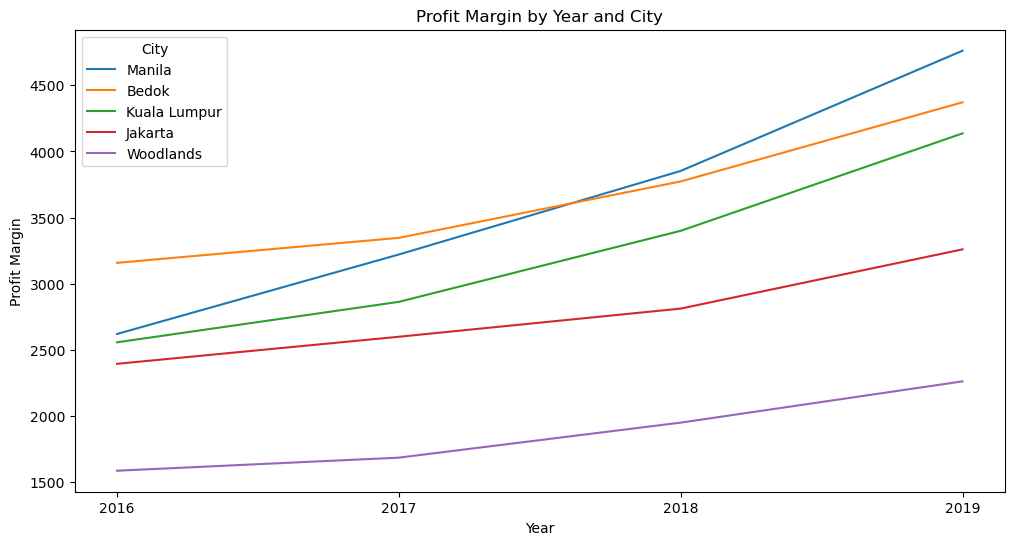

In [470]:
sorted_pivot_table = sorted_pivot_table.reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sorted_pivot_table, x='Year', y='Profit Margin', hue='City')

plt.title('Profit Margin by Year and City')
plt.xlabel('Year')
plt.ylabel('Profit Margin')

plt.xticks(ticks=sorted_pivot_table['Year'].unique(), labels=sorted_pivot_table['Year'].unique().astype(int))

plt.show()

Найбільше прибуткових товарів за весь час купували у Бідоці (Сінгіпур) та на Філіпінах. Найменш прибутковий магазин у Вудленді. Але останніх два роки найбільш тенденція змінюється і найприбутковим містом стала Маніла (Філіпіни). 

#### Які бренди є найпопулярнішими

In [537]:
df.groupby('Brand ')['Brand '].count().sort_values(ascending = False)

Brand 
Biogreen        1163
BonJour         1070
RedMart          891
Sainbury         849
Ashai            813
                ... 
Grant burge        1
Bollinger          1
Rothschild         1
Matua Valley       1
Penfolds           1
Name: Brand , Length: 366, dtype: int64

Biogreen та BonJour найбільш часто купують.

#### Середня дохідність чеку по місяцях

In [550]:
avg_profit_by_month = df.groupby(by = 'Month')['Profit Margin'].mean()

<Axes: xlabel='Month'>

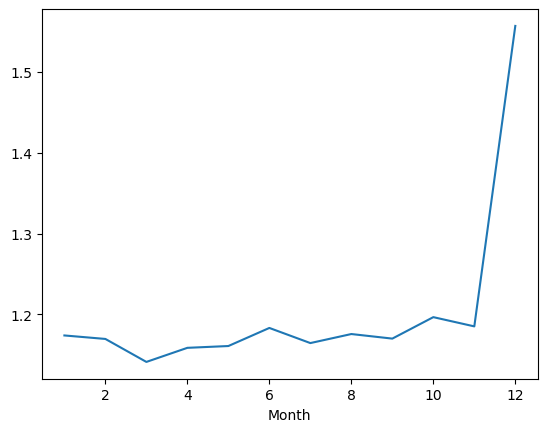

In [562]:
avg_profit_by_month.plot()

Найбільший середеій прибуток спостерігається у грудні, а найменший у березні.

#### Середня дохідність чеку по годинах

In [572]:
avg_profit_by_hour = df.groupby(by = 'Hour')['Profit Margin'].mean()

In [576]:
avg_profit_by_hour

Hour
10    1.194375
11    1.209425
12    1.204310
13    1.192996
14    1.208702
15    1.194491
16    1.172602
17    1.249609
18    1.191003
19    1.173176
20    1.193973
21    1.238781
Name: Profit Margin, dtype: float64

<Axes: xlabel='Hour'>

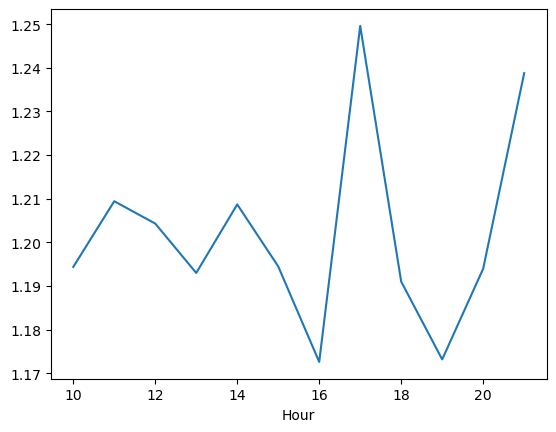

In [574]:
avg_profit_by_hour.plot()

Магазини відчинені з 10 до 21 згідно з нашими даними. Пікові години споживання - 17 та 21. Найменша середня дохідність о 16 та 17 годині.

#### Середня дохідність чеку по містах

In [587]:
avg_profit_by_city = df.groupby(by = 'City')['Profit Margin'].mean()
avg_profit_by_city.sort_values(ascending = False)

City
Woodlands       1.264230
Jakarta         1.215261
Kuala Lumpur    1.203950
Bedok           1.193742
Manila          1.167660
Name: Profit Margin, dtype: float64

Найбільше середня прибутковість у Вудленді, а найменша - у Манілі, Хоча сумарно навпаки - найбільше прибутку принесла Маніла, а найменше - Вудленд (ми це досліджували трохи раніше).

#### Середня дохідність чеку по гендеру

In [592]:
avg_profit_by_gender = df.groupby(by = 'Gender')['Profit Margin'].mean()
avg_profit_by_gender.sort_values(ascending = False)

Gender
Female    1.208885
Male      1.166754
Name: Profit Margin, dtype: float64

In [596]:
profit_by_gender = df.groupby(by = 'Gender')['Profit Margin'].sum()
profit_by_gender.sort_values(ascending = False)

Gender
Female    50557.98247
Male      10063.25528
Name: Profit Margin, dtype: float64

В середньому жінки приносять більше прибутку на одиницю товару та сумарно приносят прибутку у 6 разів більше, ніж чоловіки.

### Перeвірка стат гіпотези. Чи обирають жінки більш прибуткові товари порівняно з чоловіками?

In [642]:
female_profit_mardin = df[df['Gender'] == 'Female']['% Profit Margin']
male_profit_mardin = df[df['Gender'] == 'Male']['% Profit Margin']

In [644]:
len(female_profit_mardin), len(male_profit_mardin)

(41822, 8625)

Вибірки нерівномірні. Візьмемо по 3,000 з кожної.

In [647]:
z_score, p_value = ztest(female_profit_mardin[:3000], male_profit_mardin[:3000], alternative='larger')

print(f"P-Value: {p_value:.3f}")

P-Value: 0.102


Маємо P-Value > 0.05, отже ми не можемо відкинути нульову гіпотезу і різниці між чоловіками і жінками у купівлі прибуткових товарів немає. Жінки не купують більш прибуткові товари.

### Візуалізація системи метрик

Візуалізацію щодо динаміки прибутку у розрізі категорій, підкатегорій, локації та гендеру у вигляді інтерактивного репорту даних можна знайти за посиланням https://public.tableau.com/views/GrossaryDB/ProfitMarginAnalysis?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link